# Part A : k-NN Classifier Task

This task involves using the k-Nearest Neighbors (k-NN) algorithm to classify flowers based on their features. The process includes loading the data, preprocessing it, splitting it into training and test sets, training the k-NN model, evaluating its performance for different parameters, and identifying the best parameters. 

---

## Task Objective

The main objective is to:

- Implement the k-NN classification algorithm.
- Test different values for k (number of neighbors) and p (distance metric) to see how they affect model performance.
- Evaluate the performance of the model using both train and test data.
- Identify the best parameters (k and p) that yield the lowest classification error.

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from typing import Optional

### Step 1: Load and Preprocess the Data

- Load the dataset into a DataFrame.
- Select the relevant features for classification.
- Handle missing values and ensure data is in the correct format for processing.

---

#### Notes :
- The iris dataset was loaded from a file, and only `Feature2`, `Feature3`, and `Flower Type` columns were selected.
- Null values were checked in the selected columns. If any column contained missing values, an error was raised.
- `Feature2` and `Feature3` were converted to numeric values. Non-numeric values were handled using `pd.to_numeric`.
- The `Flower Type` column was mapped to numeric labels (e.g., `Iris-setosa` → 0 , `Iris-versicolor` → 1 , `Iris-virginica` → 2 ).
---

In [38]:
# Load and preprocess the data
file_path = "/Users/twmrgwzln/Downloads/iris.txt"
data = pd.read_csv(file_path, header=None, delim_whitespace=True, names=["Feature1", "Feature2", "Feature3", "Feature4", "Flower Type"])

# Select the relevant columns
filtered_data = data[["Feature2", "Feature3", "Flower Type"]].copy()

# Raise an error if any column contains null values
null_values = filtered_data.isnull().sum()
if null_values.any():
    raise ValueError(f"Null values detected in the following columns:\n{null_values[null_values > 0]}")

# Convert 'Feature2' and 'Feature3' to numeric
filtered_data[["Feature2", "Feature3"]] = filtered_data[["Feature2", "Feature3"]].apply(pd.to_numeric, errors='coerce')

# Map 'Flower Type' to numeric values
flower_type_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
filtered_data['Flower Type'] = filtered_data['Flower Type'].map(flower_type_mapping)

print (filtered_data.sample(5))

     Feature2  Feature3  Flower Type
121       2.8       4.9            2
66        3.0       4.5            1
10        3.7       1.5            0
33        4.2       1.4            0
69        2.5       3.9            1


---
## Step 2: Split the Data into Training and Test Sets

In this step, the dataset is divided into two halfs:
1. **Training Set**: Used to train the k-NN model.
2. **Testing Set**: Used to evaluate the performance of the trained model.

 --- 
 
#### Notes : 
- Splitting the data ensures that the model is trained on one part of the dataset and tested on unseen data to measure its ability to generalize.
- Stratified sampling is used to maintain the same class distribution in both training and testing sets, which helps in fair evaluation.

---

In [39]:
X = filtered_data[["Feature2", "Feature3"]]
y = filtered_data["Flower Type"]         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [40]:
def print_dataset_summary(X_train, X_test, y_train, y_test):

    def print_header(title):
        print(f"\n{'=' * 60}")
        print(f"{title:^60}") 
        print(f"{'=' * 60}")
    
    def print_class_distribution(label_counts, title):
        print_header(title)
        print(f"{'Class':<15}{'Samples':>15}{'Percentage':>15}")
        print(f"{'-' * 60}")
        total = label_counts.sum()
        for label, count in label_counts.sort_index().items():
            percentage = (count / total) * 100
            print(f"{label:<15}{count:>15}{percentage:>14.2f}%")
        print(f"{'-' * 60}")
        print(f"{'Total':<15}{total:>15}{'100.00%':>15}")
    
    print_header("Dataset Split Summary")
    print(f"{'Dataset':<20}{'Samples':>20}")
    print(f"{'-' * 60}")
    print(f"{'Training Set':<20}{len(X_train):>20}")
    print(f"{'Test Set':<20}{len(X_test):>20}")
    print(f"{'-' * 60}")
    print(f"{'Total':<20}{len(X_test + X_train):>20}")


    print_class_distribution(y_train.value_counts(), "Training Set Class Distribution")
    print_class_distribution(y_test.value_counts(), "Test Set Class Distribution")

print_dataset_summary(X_train, X_test, y_train, y_test)



                   Dataset Split Summary                    
Dataset                          Samples
------------------------------------------------------------
Training Set                          75
Test Set                              75
------------------------------------------------------------
Total                                150

              Training Set Class Distribution               
Class                  Samples     Percentage
------------------------------------------------------------
0                           25         33.33%
1                           25         33.33%
2                           25         33.33%
------------------------------------------------------------
Total                       75        100.00%

                Test Set Class Distribution                 
Class                  Samples     Percentage
------------------------------------------------------------
0                           25         33.33%
1                      

---

## Step 3: Train and Evaluate the k-NN Classifier

### Objective
The goal of this step is to:

- Train a k-Nearest Neighbors (k-NN) classifier on the training dataset.
- Evaluate its performance on the test dataset.
- Experiment with different values of `k` (number of neighbors) and `p` (distance metric) to identify the best combination of hyperparameters.

--- 

#### Notes : 

- `k`: Represents the number of nearest neighbors considered for classification.
    - Small k: Captures local patterns but risks overfitting.
    - Large k: Smoothens predictions but risks underfitting.
- `p`: Specifies the distance metric used to calculate distances between points:
    - p=1: Manhattan distance.
    - p=2: Euclidean distance.
    - p=∞: Chebyshev distance.
---

In [41]:
k_values = [1, 3, 5, 7, 9]
p_values = [1, 2, np.inf]  # 1: Manhattan, 2: Euclidean, ∞: Chebyshev

results = []

for p in p_values:
    
    print("=" * 50)
    print(f" Evaluating for p = {p} ".center(50))
    print("=" * 50)
    print(f"{'k':<10}{'Accuracy':<10}")
    print("-" * 50)

    for k in k_values:

        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'k': k, 'p': p, 'accuracy': accuracy})
        
        print(f"{k:<10}{accuracy:.4f}")
    print("-" * 50)


               Evaluating for p = 1               
k         Accuracy  
--------------------------------------------------
1         0.9200
3         0.9733
5         0.9733
7         0.9733
9         0.9733
--------------------------------------------------
               Evaluating for p = 2               
k         Accuracy  
--------------------------------------------------
1         0.9200
3         0.9467
5         0.9733
7         0.9733
9         0.9600
--------------------------------------------------
              Evaluating for p = inf              
k         Accuracy  
--------------------------------------------------
1         0.9067
3         0.9467
5         0.9733
7         0.9733
9         0.9600
--------------------------------------------------


---

## Step 4: Repeat the Process 100 Times

- Tests multiple `k` (number of neighbors) and `p` (distance metrics) combinations.
- Repeats the process 100 times with different train-test splits.
- Calculates train and test errors to evaluate model performance.
- Summarizes results to find the best `k` and `p` combination for accuracy.

This approach ensures robustness and allows for an in-depth comparison of parameter performance.

---

In [42]:
k_values = [1, 3, 5, 7, 9]
p_values = [1, 2, np.inf]  # Manhattan, Euclidean, Chebyshev

results = []

for iteration in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=iteration)
    
    for p in p_values:
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, p=p)
            knn.fit(X_train, y_train)
            y_train_pred = knn.predict(X_train)
            y_test_pred = knn.predict(X_test)
            
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            train_error = 1 - train_accuracy  
            test_error = 1 - test_accuracy  
            
            # Store results
            results.append({
                'iteration': iteration,
                'k': k,
                'p': p,
                'train_error': train_error,
                'test_error': test_error
            })

results_df = pd.DataFrame(results)
summary = results_df.groupby(['k', 'p']).mean().reset_index()
summary['error_diff'] = summary['test_error'] - summary['train_error']

for p_value in summary['p'].unique():
    subset = summary[summary['p'] == p_value]
    for _, row in subset.iterrows():
        print(f"p = {p_value} ," , f"k: {int(row['k'])}    {row['train_error']:.8f}    {row['test_error']:.8f}    {row['error_diff']:.8f}")
    print()


p = 1.0 , k: 1    0.01026667    0.08586667    0.07560000
p = 1.0 , k: 3    0.04013333    0.06120000    0.02106667
p = 1.0 , k: 5    0.04426667    0.05653333    0.01226667
p = 1.0 , k: 7    0.04693333    0.05706667    0.01013333
p = 1.0 , k: 9    0.04840000    0.05360000    0.00520000

p = 2.0 , k: 1    0.01026667    0.08400000    0.07373333
p = 2.0 , k: 3    0.03853333    0.06146667    0.02293333
p = 2.0 , k: 5    0.04306667    0.05653333    0.01346667
p = 2.0 , k: 7    0.04453333    0.05333333    0.00880000
p = 2.0 , k: 9    0.04613333    0.05200000    0.00586667

p = inf , k: 1    0.01026667    0.08973333    0.07946667
p = inf , k: 3    0.04000000    0.05786667    0.01786667
p = inf , k: 5    0.04400000    0.05853333    0.01453333
p = inf , k: 7    0.04733333    0.05680000    0.00946667
p = inf , k: 9    0.04840000    0.05680000    0.00840000



---

## Step 4: Find the Best Parameters

The row with the smallest `test_error` in the `summary` DataFrame is selected using `idxmin()` This row contains the optimal `k` and `p`. <br>
The values of `k`,`p`,`test_error`,`train_error`, and `error_diff` are printed in a formatted and readable way.

---

#### Notes :

- This step identifies the best combination of hyperparameters for the k-NN model, minimizing the error on the test dataset.
- The difference between `train_error` and `test_error` indicates how well the model generalizes to unseen data.

---

In [43]:
best_params = summary.loc[summary['test_error'].idxmin()]

print("Best Parameters:")
print(f"  k = {int(best_params['k'])}")
print(f"  p = {best_params['p']}")
print(f"  Test Error = {best_params['test_error']:.8f}")
print(f"  Train Error = {best_params['train_error']:.8f}")
print(f"  Error Difference = {best_params['error_diff']:.8f}")

Best Parameters:
  k = 9
  p = 2.0
  Test Error = 0.05200000
  Train Error = 0.04613333
  Error Difference = 0.00586667


# Part B : DecisionTree Classifier Task




---

## Explanation of the `TreeNode` Class

The `TreeNode` class represents a single node in a decision tree. It is used to store information about a feature, a threshold, and child nodes. This class is fundamental for constructing decision trees, allowing the classification of data points by traversing the tree structure.

### Attributes:
- **`feature_idx`** (`int`): The index of the feature used for splitting the data at this node.
- **`threshold`** (`float`): The numerical value that separates data into left and right branches.
- **`label`** (`int` or `None`): If the node is a leaf, it holds a class label (e.g., `0` or `1`). Otherwise, it is `None`.
- **`left`** (`TreeNode` or `None`): A reference to the left child node, which contains data points satisfying `feature_value <= threshold`.
- **`right`** (`TreeNode` or `None`): A reference to the right child node, which contains data points satisfying `feature_value > threshold`.
- **`level`** (`int`): The depth of the node in the tree, useful for visualization and debugging.

### Methods:
#### `predict(self, x: np.ndarray) -> int`
This method takes a single instance `x` (a NumPy array representing a feature vector) and predicts its class label by following the decision path in the tree.

1. **If the node is a leaf (`self.label is not None`)**, return the stored label.
2. **If the node has no children (`self.left is None or self.right is None`)**, return the label if available, or default to `0`.
3. **Otherwise, compare `x[self.feature_idx]` with `self.threshold`**:
   - If the feature value is **less than or equal to the threshold**, move to the left child.
   - If it is **greater than the threshold**, move to the right child.
   - Recursively repeat this process until reaching a leaf node.
---

In [44]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value 

    def is_leaf(self):
        return self.value is not None


## Explanation of DecisionTreeBruteForce

### Overview
The `DecisionTreeBruteForce` class implements a decision tree classifier using a brute-force approach. Instead of selecting the best split heuristically, this method tries **all possible splits** and evaluates all potential trees before selecting the one with the lowest classification error.

### Attributes
- `max_depth`: Defines the maximum depth of the tree to prevent overfitting.
- `root`: Stores the root node of the decision tree after training.

### Methods
#### `_get_possible_splits(X: np.ndarray) -> list`
- Generates all possible split points for each feature by computing the midpoints between unique values.
- Returns a list of `(feature_idx, threshold)` pairs.

#### `_generate_all_trees(X: np.ndarray, y: np.ndarray, depth: int = 0) -> list`
- Recursively generates **all possible trees** by:
  1. Checking stopping conditions (maximum depth or pure labels).
  2. Trying **every possible split** from `_get_possible_splits`.
  3. Recursively constructing left and right subtrees.
- Returns a list of potential decision trees.

#### `fit(X: np.ndarray, y: np.ndarray) -> tuple`
- Builds the decision tree by generating all possible trees and selecting the one with the lowest classification error.
- Returns the best tree and its error rate.

In [45]:
class DecisionTreeBruteForce:
    """
    Decision tree implementation using a brute-force approach.
    """
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
        self.root = None

    def _get_possible_splits(self, X: np.ndarray) -> list:
        """Generate all possible splits for each feature."""
        splits = []
        for feature_idx in range(X.shape[1]):
            unique_values = np.unique(X[:, feature_idx])
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2  # Midpoints
            splits.extend([(feature_idx, threshold) for threshold in thresholds])
        return splits

    def _generate_all_trees(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> list:
        """Generate all possible trees iteratively using a queue."""
        if depth >= self.max_depth or len(set(y)) == 1:
            return [TreeNode(label=1 if np.mean(y) >= 0.5 else 0, level=depth)]

        splits = self._get_possible_splits(X)
        trees = []

        for feature_idx, threshold in splits:
            left_mask = X[:, feature_idx] <= threshold
            right_mask = ~left_mask

            if not (np.any(left_mask) and np.any(right_mask)):
                continue

            left_trees = self._generate_all_trees(X[left_mask], y[left_mask], depth + 1)
            right_trees = self._generate_all_trees(X[right_mask], y[right_mask], depth + 1)

            for left in left_trees:
                for right in right_trees:
                    node = TreeNode(feature_idx=feature_idx, threshold=threshold, level=depth)
                    node.left = left
                    node.right = right
                    trees.append(node)

        return trees

    def fit(self, X: np.ndarray, y: np.ndarray) -> tuple:
        """Fit the brute-force decision tree."""
        all_trees = self._generate_all_trees(X, y)
        best_error = float('inf')
        best_tree = None

        for tree in all_trees:
            predictions = np.array([tree.predict(x) for x in X])
            error = np.mean(predictions != y)
            if error < best_error:
                best_error = error
                best_tree = tree

        self.root = best_tree if best_tree is not None else TreeNode(label=np.bincount(y).argmax())  # Default to majority class
        return self.root, best_error


# Brute-force Approach (A)

## Overview
This approach recursively generates all possible decision trees up to a specified depth and selects the best tree based on classification error. It follows a brute-force method by evaluating every possible split at every depth level.

### Function: `generate_all_trees(X, y, depth)`

#### **Purpose**
The function constructs decision trees by iterating over all features and thresholds, splitting the dataset, and selecting the tree with the lowest classification error.

#### **Parameters**
- `X`: A 2D NumPy array representing the feature matrix.
- `y`: A 1D NumPy array representing the target labels.
- `depth`: The maximum depth of the tree.

#### **Logic Breakdown**
1. **Base Case**:
   - If `depth == 0` (max depth reached) or `y` is pure (all labels are the same), return a leaf node with the majority class.

2. **Iterate Over Features**:
   - Loop through each feature in `X` and consider all unique values in that feature as potential split thresholds.

3. **Split Data**:
   - For each threshold, divide `X` and `y` into left and right subsets.
   - If both subsets are non-empty, recursively generate all possible left and right subtrees.

4. **Tree Evaluation**:
   - Construct a tree using the current feature and threshold.
   - Predict labels using the generated tree (`predict_tree` function).
   - Compute the classification error.

5. **Select the Best Tree**:
   - Track the tree with the lowest error and return it.

#### **Edge Cases Handled**
- If no valid split is found, return a leaf node with the most common class.

#### **Time Complexity**
Since this method evaluates all possible trees, its time complexity is **exponential** in the worst case, making it inefficient for large datasets.

In [46]:
# Ensure X_test and y_test are NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [47]:
# Brute-force approach (A)
def generate_all_trees(X, y, depth):
    """
    Recursively generate all possible trees up to given depth.
    """
    if depth == 0 or np.all(y == y[0]):  # Pure node or max depth reached
        return [Node(value=np.bincount(y).argmax())]

    best_tree = None
    min_error = float('inf')

    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_indices = X[:, feature] <= threshold
            right_indices = ~left_indices

            if np.any(left_indices) and np.any(right_indices):
                left_trees = generate_all_trees(X[left_indices], y[left_indices], depth - 1)
                right_trees = generate_all_trees(X[right_indices], y[right_indices], depth - 1)

                for left, right in zip(left_trees, right_trees):
                    root = Node(feature=feature, threshold=threshold, left=left, right=right)
                    y_pred = predict_tree(root, X)
                    error = np.sum(y_pred != y) / len(y)

                    if error < min_error:
                        min_error = error
                        best_tree = root

    return [best_tree] if best_tree else [Node(value=np.bincount(y).argmax())]



# Entropy-based Approach (B)


This approach builds a decision tree using entropy-based splitting. It selects the best feature and threshold that minimize entropy at each step, making it a more efficient and structured alternative to the brute-force approach.


### **1. `split_entropy(y)`**
##### **Purpose**:
Computes the entropy of a given set of labels `y`. Entropy measures the impurity of a node; a lower entropy value indicates a purer split.

##### **Logic**:
- Counts occurrences of each unique class in `y`.
- Uses the entropy formula:  
  \[
  H(y) = - \sum p_i \log_2 p_i
  \]
  where \( p_i \) is the probability of class \( i \).

---

### **2. `best_entropy_split(X, y)`**
##### **Purpose**:
Finds the best feature and threshold that minimize entropy when splitting `X`.

##### **Logic**:
1. Initialize `best_feature`, `best_threshold`, and `min_entropy` as placeholders.
2. Iterate over all features and possible threshold values.
3. For each threshold:
   - Split `X` and `y` into left and right subsets.
   - Compute entropy for each subset.
   - Sum left and right entropies to get the total entropy.
4. Select the split that results in the lowest total entropy.

##### **Edge Cases Handled**:
- If no valid split is found, returns `None`, indicating a pure or unsplittable dataset.

---

### **3. `build_entropy_tree(X, y, depth)`**
##### **Purpose**:
Recursively constructs a decision tree using entropy-based splitting.

##### **Logic**:
1. **Base Case**:
   - If `depth == 0` (max depth reached) or `y` is pure, return a leaf node with the majority class.

2. **Find Best Split**:
   - Use `best_entropy_split(X, y)` to determine the optimal feature and threshold.

3. **Recursive Tree Construction**:
   - If no valid split is found, return a leaf node.
   - Otherwise, recursively build left and right subtrees using the selected split.

---

### **4. `predict_tree(tree, X)`**
##### **Purpose**:
Predicts labels for new samples using a trained decision tree.

##### **Logic**:
1. Iterate over all samples in `X`.
2. Traverse the tree from root to leaf:
   - If `sample[feature] <= threshold`, move to the left subtree.
   - Otherwise, move to the right subtree.
3. Return the class label of the leaf node.

---

## **Comparison with Brute-force Approach**
| Approach         | Brute-force (A) | Entropy-based (B) |
|-----------------|---------------|------------------|
| **Splitting Criterion** | Exhaustive search for lowest error | Uses entropy to measure impurity |
| **Efficiency** | Very slow (evaluates all possible trees) | More efficient (evaluates only entropy-minimizing splits) |
| **Optimality** | Finds best tree but impractical for large datasets | Greedy but effective for practical use |
| **Scalability** | Not scalable | More scalable |

---

## **Advantages of Entropy-based Splitting**
- Reduces computation compared to brute-force.  
- Provides a structured way to choose splits.  
- Works well in classification tasks by minimizing uncertainty.

---

In [48]:
# Entropy-based approach (B)
def split_entropy(y):
    """Compute entropy of a split."""
    _, counts = np.unique(y, return_counts=True)
    return entropy(counts, base=2)

def best_entropy_split(X, y):
    """Find best split that minimizes entropy."""
    best_feature, best_threshold, min_entropy = None, None, float('inf')

    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_mask = X[:, feature] <= threshold
            right_mask = ~left_mask

            if np.any(left_mask) and np.any(right_mask):
                left_entropy = split_entropy(y[left_mask])
                right_entropy = split_entropy(y[right_mask])
                total_entropy = left_entropy + right_entropy

                if total_entropy < min_entropy:
                    min_entropy = total_entropy
                    best_feature, best_threshold = feature, threshold

    return best_feature, best_threshold

def build_entropy_tree(X, y, depth):
    """Build decision tree using entropy-based splitting."""
    if depth == 0 or np.all(y == y[0]):  # Stop if pure or max depth reached
        return Node(value=np.bincount(y).argmax())

    feature, threshold = best_entropy_split(X, y)
    if feature is None:
        return Node(value=np.bincount(y).argmax())

    left_mask = X[:, feature] <= threshold
    right_mask = ~left_mask

    left_subtree = build_entropy_tree(X[left_mask], y[left_mask], depth - 1)
    right_subtree = build_entropy_tree(X[right_mask], y[right_mask], depth - 1)

    return Node(feature=feature, threshold=threshold, left=left_subtree, right=right_subtree)

# Tree prediction function
def predict_tree(tree, X):
    """Predict labels for X using a decision tree."""
    preds = []
    for sample in X:
        node = tree
        while not node.is_leaf():
            if sample[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        preds.append(node.value)
    return np.array(preds)

### Building and Evaluating Decision Trees

In [49]:
brute_tree = generate_all_trees(X_train, y_train, depth=3)[0]
entropy_tree = build_entropy_tree(X_train, y_train, depth=3)

y_pred_brute = predict_tree(brute_tree, X_test)
y_pred_entropy = predict_tree(entropy_tree, X_test)

error_brute = np.mean(y_pred_brute != y_test)
error_entropy = np.mean(y_pred_entropy != y_test)

print(f"Brute-force Tree Error: {error_brute:.4f}")
print(f"Entropy-based Tree Error: {error_entropy:.4f}")


Brute-force Tree Error: 0.0800
Entropy-based Tree Error: 0.0667


#  Decision Tree Visualization

### **Overview**
This module provides utilities for visualizing decision trees using Matplotlib.

### **Function: `plot_tree(node, ax, x, y, width)`**
#### **Purpose**:
- Recursively plots the structure of a decision tree.
- Displays decision nodes and leaf nodes with labels.

#### **Key Features**:
- Uses **Matplotlib** to render the tree.  
- Nodes are represented as **circles** with decision conditions or class labels.  
- **Recursive approach** to draw child nodes and branches.

In [50]:
def plot_tree(node: Node, ax: Optional[plt.Axes] = None, x: float = 0.5, 
              y: float = 1.0, width: float = 1.0) -> plt.Axes:
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')

    # Draw the node
    circle = plt.Circle((x, y), 0.02, color='white', ec='black')
    ax.add_patch(circle)

    # Display node label (decision or leaf)
    text = (f'Leaf: {node.value}' if node.value is not None 
            else f'X[{node.feature}] ≤ {node.threshold:.2f}')
    ax.text(x, y + 0.02, text, ha='center', va='bottom')

    # Recursively plot left and right children
    if node.left or node.right:
        child_y = y - 0.2
        if node.left:
            left_x = x - width / 4
            ax.plot([x, left_x], [y, child_y], 'k-')
            plot_tree(node.left, ax, left_x, child_y, width / 2)
        if node.right:
            right_x = x + width / 4
            ax.plot([x, right_x], [y, child_y], 'k-')
            plot_tree(node.right, ax, right_x, child_y, width / 2)

    return ax


# Plot the Brute-Force Tree


<AxesSubplot:>

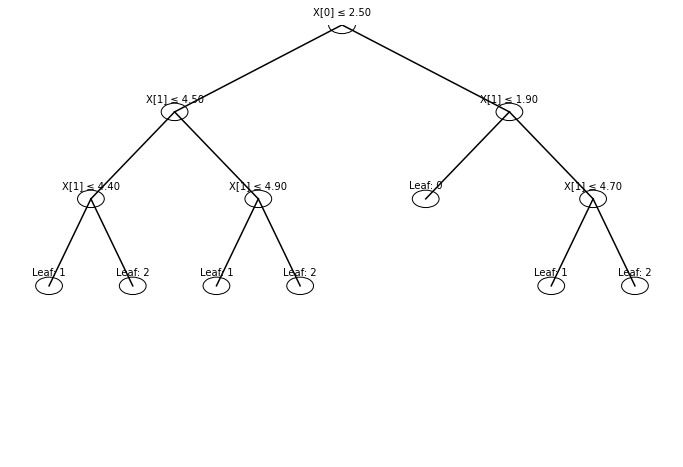

In [51]:
plot_tree(brute_tree)

# Plot the Entropy-Based Tree

<AxesSubplot:>

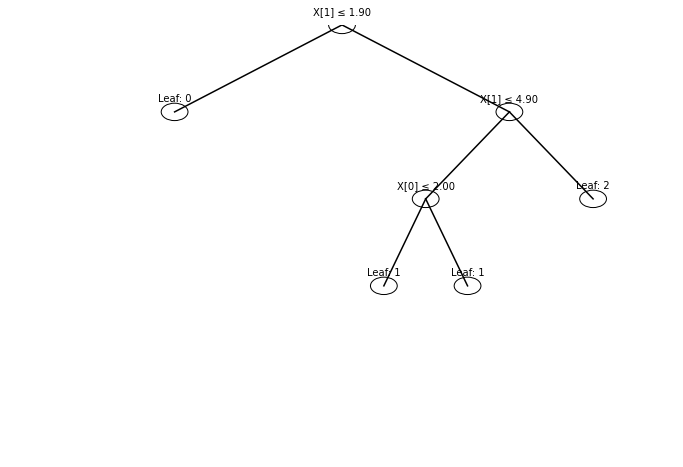

In [52]:
plot_tree(entropy_tree)